In [1]:
datasetName = 'brain_cortex_Gaublomme2019_part1'
#datasetName value: organ_tissue_authorYear without space
dataFormat = '10X'
#dataFormat value: tsv (tab separated), 10X (sparse)
setwd("/stor/public/hcad/brain_cortex_Gaublomme2019_part1")

In [1]:
library(Seurat)
library(data.table)
library(ggplot2)
# Load the organized dataset
if(dataFormat == 'tsv'){
    data.matrix <- data.table::fread(paste0(datasetName,"_expression.tsv.gz"), h = T, data.table = F)
} else{
   # system(paste0("tar -zxvf ", datasetName, "_expression.tar.gz")) #Invoke the unix command
   data.matrix <- Read10X(data.dir = paste0(datasetName,"_expression"))
   # data.dir: Directory containing the matrix.mtx, genes.tsv (or features.tsv), and barcodes.tsv files provided by 10X.
}
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 4)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)


ERROR: Error in eval(expr, envir, enclos): object 'dataFormat' not found


In [3]:
data.matrix[1:5, 1:5]
data.metadata[1:5, ]
data.annotation[1:5,]

5 x 5 sparse Matrix of class "dgCMatrix"
             human_pbs-AAACCTGAGGCTCAGA human_pbs-AAACCTGCAAGTACCT
RP11-34P13.3                          .                       .   
RP11-34P13.7                          .                       .   
FO538757.3                            .                       .   
FO538757.2                            .                       3.04
AP006222.2                            .                       .   
             human_pbs-AAACCTGCAGCCTTTC human_pbs-AAACCTGCAGTTCATG
RP11-34P13.3                       .                          .   
RP11-34P13.7                       .                          .   
FO538757.3                         .                          .   
FO538757.2                         2.79                       3.01
AP006222.2                         .                          .   
             human_pbs-AAACCTGGTACCAGTT
RP11-34P13.3                          .
RP11-34P13.7                          .
FO538757.3                         

,organ,region,subregion,donor_ID,donor_gender,donor_age
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
human_pbs-AAACCTGAGGCTCAGA,brain,cortex,dorsolateral prefrontal cortex,S6,M,96.5
human_pbs-AAACCTGCAAGTACCT,brain,cortex,dorsolateral prefrontal cortex,S8,M,85.8
human_pbs-AAACCTGCAGCCTTTC,brain,cortex,dorsolateral prefrontal cortex,S4,M,86.5
human_pbs-AAACCTGCAGTTCATG,brain,cortex,dorsolateral prefrontal cortex,S6,M,96.5
human_pbs-AAACCTGGTACCAGTT,brain,cortex,dorsolateral prefrontal cortex,S7,F,94.0


[1] Oligodendrocyte      Glutamatergic neuron Glutamatergic neuron
[4] Glutamatergic neuron Oligodendrocyte     
7 Levels: Astrocyte Endothelial cell GABAergic neuron ... OPC

In [6]:
# Pre-processing for part 1
min.cells = 5
min.features = 200
nFeature_RNA_range = c(200, 6000)
percent.mt.thre = 10
# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName, min.features = min.features, meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [7]:
dataobj@assays

$RNA
Assay data with 28363 features for 9923 cells
First 10 features:
 RP11-34P13.3, RP11-34P13.7, FO538757.3, FO538757.2, AP006222.2,
RP4-669L17.2, RP4-669L17.10, RP5-857K21.4, RP5-857K21.2, RP11-206L10.4 


In [8]:
# Normalization
# Two approaches
# 1. run standard log normalization 
# dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj, selection.method = 'vst', mean.cutoff = c(0.5, Inf)) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(object = dataobj))
# dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))
# 2. run sctransform 
# dataobj <- SCTransform(dataobj, vars.to.regress = "percent.mt", do.correct.umi = TRUE, do.scale = TRUE, do.center = TRUE)

Centering and scaling data matrix



In [9]:
length(VariableFeatures(object = dataobj))

[1] 2000

In [10]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))
# Determine the ‘dimensionality’ of the dataset according to elbow plot

PC_ 1 
Positive:  MEG3, SYT1, FGF14, OPCML, STXBP5L, KCNQ5, RIMS2, GRM5, CSMD1, SNTG1 
	   LRFN5, FGF12, ATRNL1, DLGAP1, FRMPD4, FAM155A, RALYL, KHDRBS2, LRRTM4, CCSER1 
	   KCNIP4, NEGR1, PLCB1, RYR2, RGS7, DCLK1, AGBL4, CSMD3, ZNF385B, KALRN 
Negative:  PLP1, QKI, ST18, TMEM144, NEAT1, PIP4K2A, MBP, ZBTB20, RNF220, PTGDS 
	   NCKAP5, DOCK5, MIR219A2, CNP, LINC01608, C10orf90, CLDN11, PDE4B, PHLPP1, DAAM2 
	   ENPP2, CNDP1, TF, TMEM165, HEPN1, DOCK10, ERBB2IP, MOBP, RFTN2, KCNH8 
PC_ 2 
Positive:  SLC24A2, ST18, PLP1, MBP, EDIL3, SLC44A1, PEX5L, NRXN3, CTNNA3, CLDN11 
	   TMEM144, ELMO1, SPOCK3, RNF220, SHTN1, PIP4K2A, LINC01608, PDE1C, PRUNE2, QDPR 
	   ENPP2, MIR219A2, MOBP, CNP, TF, CNDP1, TMEM165, DOCK10, ANO4, KCNH8 
Negative:  SLC1A2, AQP4, ADGRV1, ATP1A2, SLC1A3, GFAP, GPC5, SLC14A1, MT2A, RANBP3L 
	   TPD52L1, PITPNC1, GJA1, HIF3A, RYR3, RNF219-AS1, COL5A3, GPM6A, RNF19B, DTNA 
	   LINC00499, PARD3, CST3, F3, ATP1B2, NKAIN3, MT1E, BMPR1B, PREX2, AHCYL1 
PC_ 3 
Positive:  SYK, 

Warning message in ElbowPlot(dataobj, ndims = 100):
“The object only has information for 50 reductions”


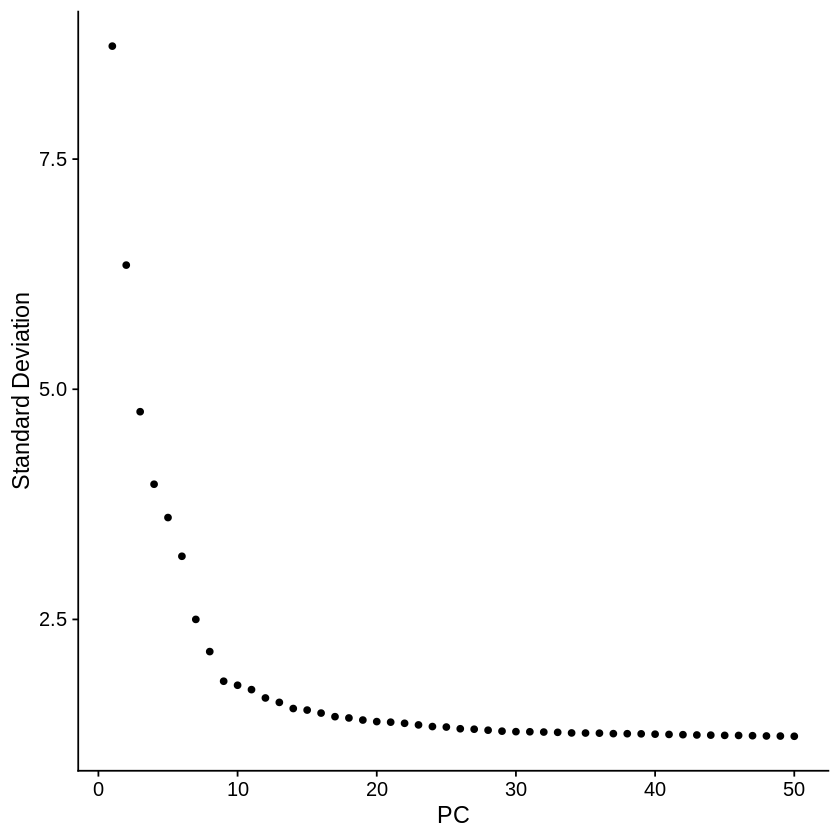

In [11]:
ElbowPlot(dataobj, ndims = 100) 
# pdf(paste0(datasetName,"seurat.elbowplot.pdf"))

In [12]:
dev.off()
pcDim = 50 # set as 75 in this case 
# dataobj <- RunUMAP(dataobj, dims = 1:pcDim)
# DimPlot(dataobj, reduction = "tsne", label = TRUE)
# ggsave(paste0(datasetName,".seurat.umap.tiff", plot = p_umap, width = 8, height = 5)

null device 
          1

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


In [28]:
# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim)
dataobj <- FindClusters(dataobj, resolution = 1.3)
# umap
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9923
Number of edges: 578638

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8484
Number of communities: 19
Elapsed time: 1 seconds


07:24:14 UMAP embedding parameters a = 0.9922 b = 1.112

07:24:14 Read 9923 rows and found 50 numeric columns

07:24:14 Using Annoy for neighbor search, n_neighbors = 30

07:24:14 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

07:24:16 Writing NN index file to temp file /tmp/Rtmpj6cTBP/file4d3674a6a0e1

07:24:16 Searching Annoy index using 1 thread, search_k = 3000

07:24:20 Annoy recall = 100%

07:24:20 Commencing smooth kNN distance calibration using 1 thread

07:24:21 Initializing from normalized Laplacian + noise

07:24:22 Commencing optimization for 500 epochs, with 455640 positive edges

07:24:52 Optimization finished



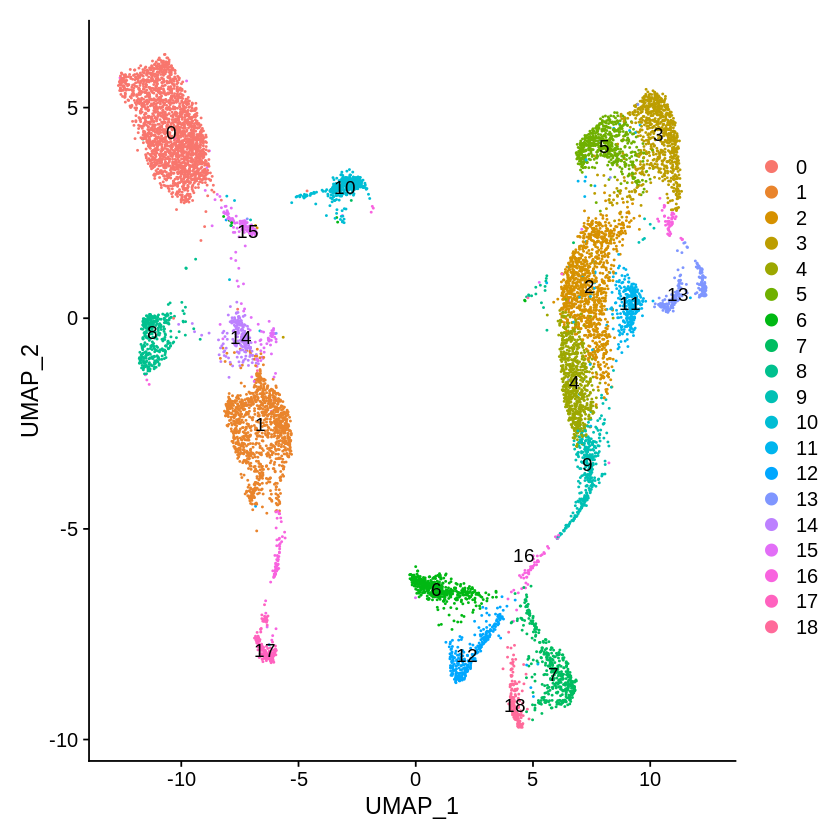

In [29]:
# Clusters marked by Seurat clustering results
p_umap <- DimPlot(dataobj, reduction = "umap", label = TRUE)
p_umap

In [26]:
ggsave(paste0(datasetName,".seurat.umap1.tiff"), plot = p_umap, width = 8, height = 5)

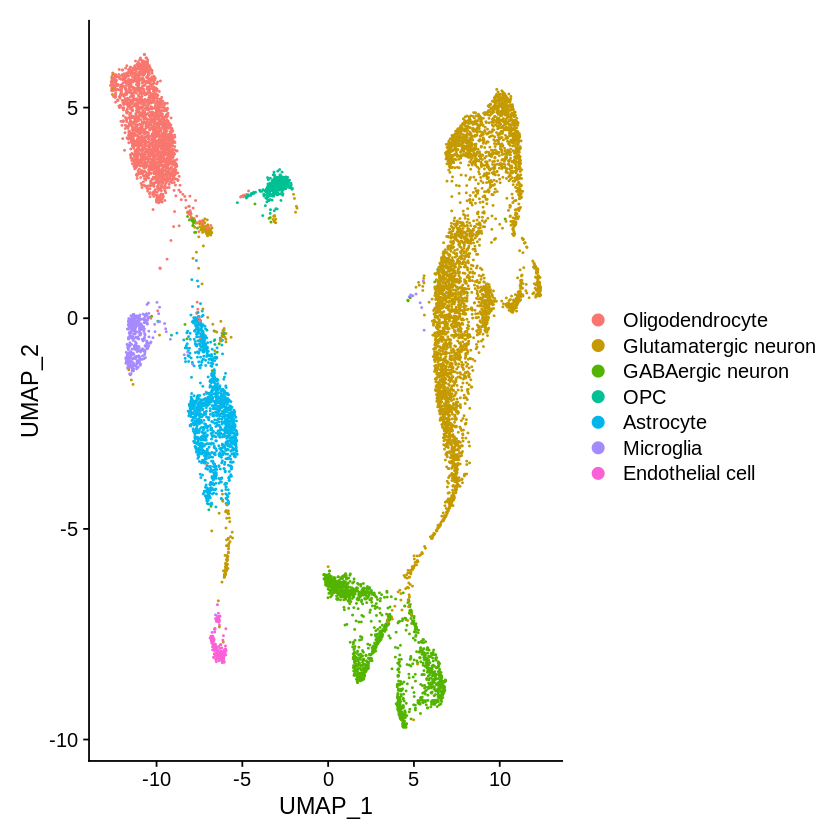

In [27]:
# Clusters marked by given identities
Idents(dataobj) <- as.character(data.annotation$annotation)
p_umap <- DimPlot(dataobj, reduction = "umap", label = FALSE)
p_umap

In [31]:
new.cluster.ids <- c("Oligodendrocyte", "Astrocyte", rep("Glutamatergic neuron", 4), "GABAergic neuron", "GABAergic neuron", "Microglia", 
                    "Glutamatergic neuron", "OPC", "Glutamatergic neuron", "GABAergic neuron", "Glutamatergic neuron", "Astrocyte", 
                    "Glutamatergic neuron", "Glutamatergic neuron", "Endothelial cell", "GABAergic neuron")
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)

In [30]:
annotation <- as.data.frame(cbind(colnames(data.matrix), as.character(data.annotation$annotation), seurat_cluster = as.character(Idents(dataobj))))
annotation <- annotation[, -1]
annotation <- annotation[order(annotation$seurat_cluster, annotation$V2), ]
print(annotation)

                       V2 seurat_cluster
2072 Glutamatergic neuron              0
3131 Glutamatergic neuron              0
4259 Glutamatergic neuron              0
7367 Glutamatergic neuron              0
1         Oligodendrocyte              0
5         Oligodendrocyte              0
10        Oligodendrocyte              0
16        Oligodendrocyte              0
21        Oligodendrocyte              0
22        Oligodendrocyte              0
29        Oligodendrocyte              0
32        Oligodendrocyte              0
42        Oligodendrocyte              0
55        Oligodendrocyte              0
61        Oligodendrocyte              0
64        Oligodendrocyte              0
65        Oligodendrocyte              0
68        Oligodendrocyte              0
69        Oligodendrocyte              0
88        Oligodendrocyte              0
89        Oligodendrocyte              0
90        Oligodendrocyte              0
92        Oligodendrocyte              0
94        Oligod

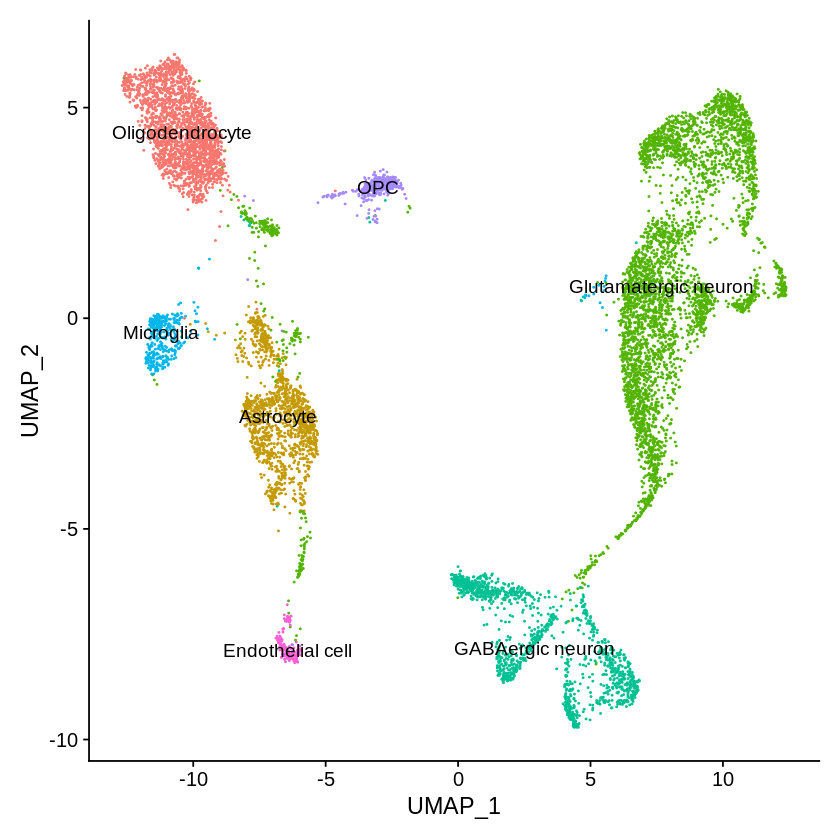

In [32]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE) + NoLegend()
p_umap2

In [33]:
ggsave(paste0(datasetName,".seurat.umap2.tiff"), plot = p_umap2, width = 8, height = 5)

In [22]:
# Finding cluster markers 
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)


Calculating cluster Oligodendrocyte

Calculating cluster Astrocyte

Calculating cluster Glutamatergic neuron

Calculating cluster GABAergic neuron

Calculating cluster Microglia

Calculating cluster OPC

Calculating cluster Endothelial cell



In [23]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [1]:
datasetName = 'brain_cortex_Gaublomme2019_part1'
setwd("/stor/public/hcad/brain_cortex_Gaublomme2019_part1")
marker <- read.delim(file = paste0(datasetName,".seurat.markers.txt"))

In [2]:
marker[order(marker$cluster),]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
549,0,3.920669,0.510,0.013,0,Astrocyte,SLC14A1
550,0,3.664853,0.936,0.168,0,Astrocyte,SLC1A2
551,0,3.560500,0.713,0.031,0,Astrocyte,AQP4
552,0,3.227165,0.940,0.220,0,Astrocyte,ADGRV1
553,0,3.136760,0.604,0.035,0,Astrocyte,GFAP
554,0,3.133429,0.525,0.039,0,Astrocyte,LINC00499
555,0,3.123414,0.590,0.041,0,Astrocyte,RANBP3L
556,0,3.120880,0.458,0.012,0,Astrocyte,GJA1
557,0,3.112737,0.435,0.013,0,Astrocyte,F3


In [3]:
levels(marker$cluster)

[1] "Astrocyte"            "Endothelial cell"     "GABAergic neuron"    
[4] "Glutamatergic neuron" "Microglia"            "Oligodendrocyte"     
[7] "OPC"